# Heart Failure Prediction - Data Science Project 

# 1. Problem Statement

Cardiovascular diseases such as heart failures, heart muscle disease, heart valve disease, etc. are the leading cause of death globally. The most commom symptoms for cardiovascular diseases include chest pain, numb legs and/or arms, lightheaded, and swollen limbs. It is important to be able to predict a potential heart disease based on some data of the human body. With this dataset, it contains features that can help us to create machine learning model in predicting cardiovascular diseases.

# 2. Data Collection
Source: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?datasetId=1582403&searchQuery=linear

Attribute Information
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
• RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
7. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
8. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
9. Oldpeak: oldpeak = ST [Numeric value measured in depression]
10. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
11. HeartDisease: output class [1: heart disease, 0: Normal]

## Load Data

In [964]:
import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

import sklearn
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,recall_score,f1_score

import warnings
warnings.filterwarnings('ignore')

# read heart.csv in to a dataframe
data = pd.read_csv('heart.csv', engine = 'python', encoding='utf-8')

# 3. Data Cleaning
It is important to stay organized, avoid mistakes, and increase productivity to product trustworthy insights with cleaned data.

During the data cleaning process, check if there are missing/duplicated/irrelevant data in the dataset and remove the observations if necessary. We can also check if there is any outliers and remove them for more accurate data. Convert data types if necessary.

Common steps in data cleaning process (https://www.knowledgehut.com/blog/data-science/data-cleaning):
1. Removing duplicates 
2. Remove irrelevant data 
3. Standardize capitalization 
4. Convert data type 
5. Handling outliers 
6. Fix errors 
7. Language Translation 
8. Handle missing values 

In [965]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [966]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [967]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [968]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [969]:
data.shape

(918, 12)

In [970]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [971]:
data[data.duplicated() == True]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


There is no duplicated data.

<AxesSubplot:xlabel='RestingBP'>

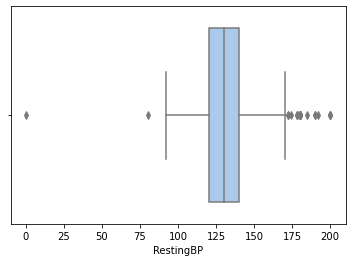

In [972]:
# Check for outliers for RestingBP column

sns.boxplot(x = data["RestingBP"], palette = "pastel")

<AxesSubplot:xlabel='RestingBP'>

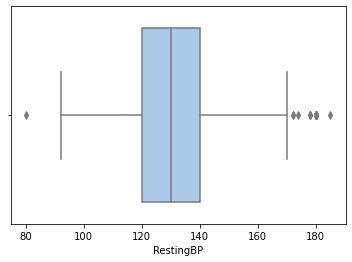

In [973]:
# Remove main outliers for RestingBP column
data = data[(np.abs(stats.zscore(data["RestingBP"])) < 3)]
sns.boxplot(x = data["RestingBP"], palette = "pastel")

<AxesSubplot:xlabel='Cholesterol'>

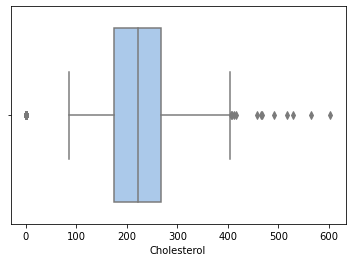

In [974]:
# Check for outliers for Cholesterol column
sns.boxplot(x = data["Cholesterol"], palette = "pastel")

<AxesSubplot:xlabel='Cholesterol'>

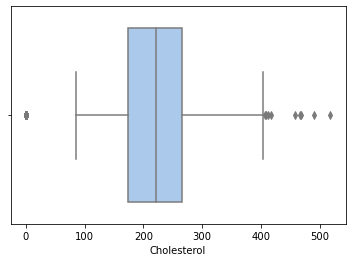

In [975]:
# Remove main outliers for Cholesterol column

data = data[(np.abs(stats.zscore(data["Cholesterol"])) < 3)]

sns.boxplot(x = data["Cholesterol"], palette = "pastel")

<AxesSubplot:xlabel='MaxHR'>

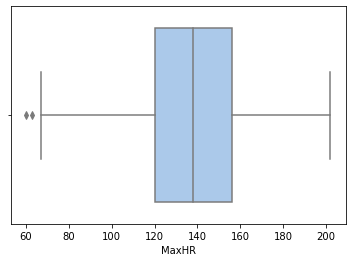

In [976]:
# Check for outliers for MaxHR column

sns.boxplot(x = data["MaxHR"], palette = "pastel")

<AxesSubplot:xlabel='MaxHR'>

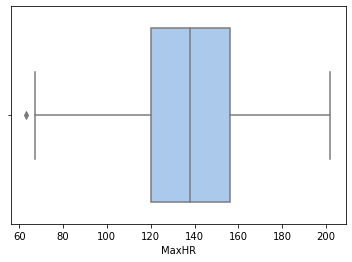

In [977]:
# Remove main outliers for MaxHR column

data = data[(np.abs(stats.zscore(data["MaxHR"])) < 3)]
sns.boxplot(x = data["MaxHR"], palette = "pastel")

<AxesSubplot:xlabel='Oldpeak'>

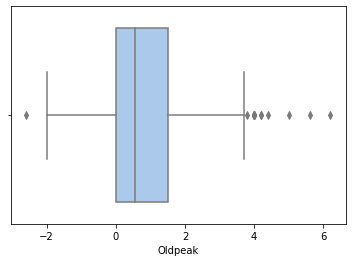

In [978]:
# Check for outliers for Oldpeak column

sns.boxplot(x = data["Oldpeak"], palette = "pastel")

<AxesSubplot:xlabel='Oldpeak'>

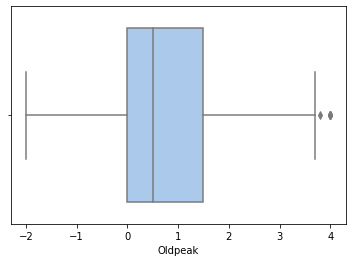

In [979]:
# Remove main outliers for Oldpeak column

data = data[(np.abs(stats.zscore(data["Oldpeak"])) < 3)]
sns.boxplot(x = data["Oldpeak"], palette = "pastel")

### Data Cleaning Summary

There are 918 rows and 12 columns in the dataset, with no duplicated or missing data. Therefore, no observations need to be dropped in the dataset.

# 4. Exploratory Data Analysis (EDA)

In [980]:
#tree map, pie, pairplot, Bar, heat map, box plot

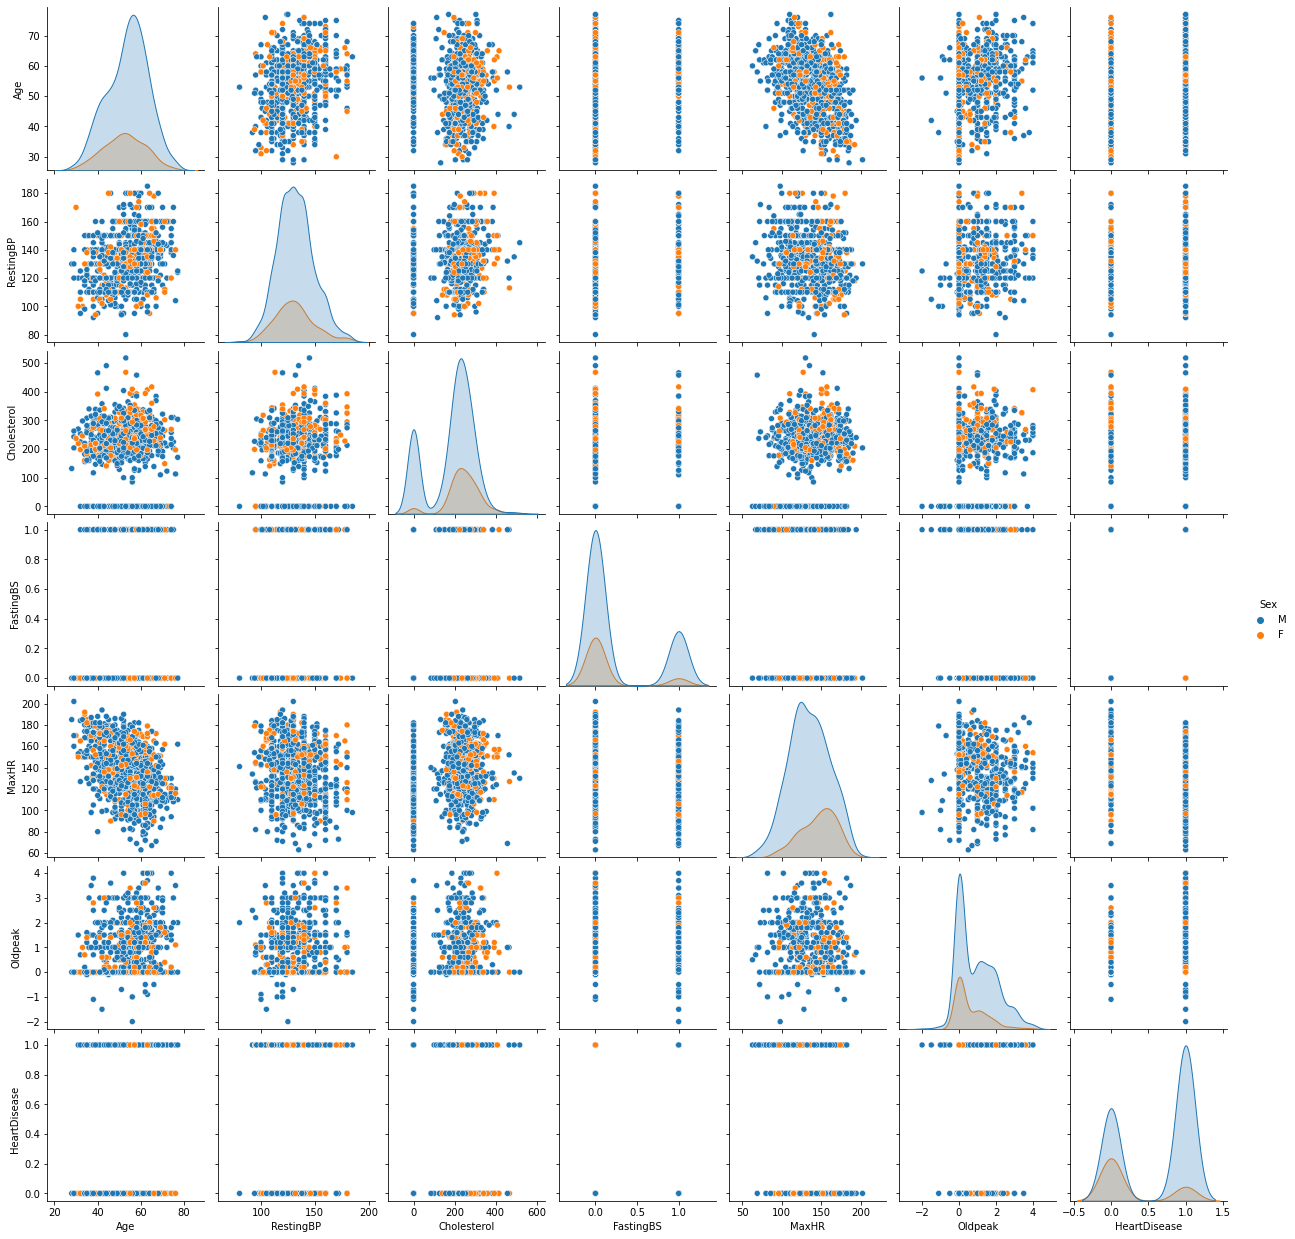

In [981]:
# attributes = list(data.columns.values)
sns.pairplot(data, hue = "Sex")

<AxesSubplot:>

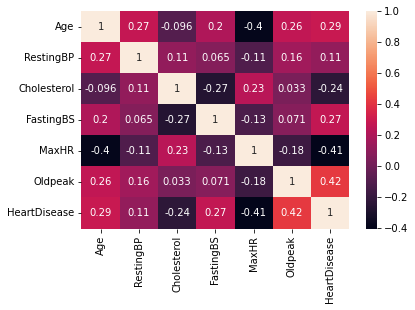

In [982]:
# Show correlations between features

sns.heatmap(data.corr(), annot = True)

Text(0, 0.5, 'Count')

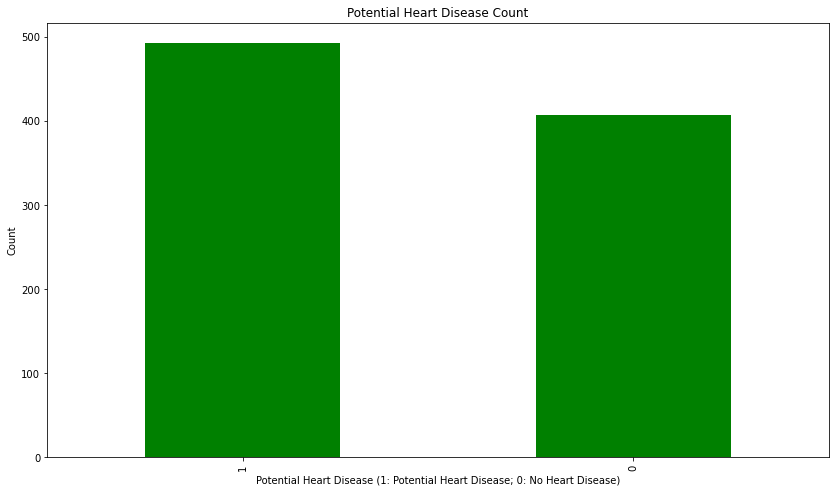

In [983]:
bar_state = data['HeartDisease'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Potential Heart Disease Count", color = "green")
bar_state.set_xlabel("Potential Heart Disease (1: Potential Heart Disease; 0: No Heart Disease)")
bar_state.set_ylabel("Count")

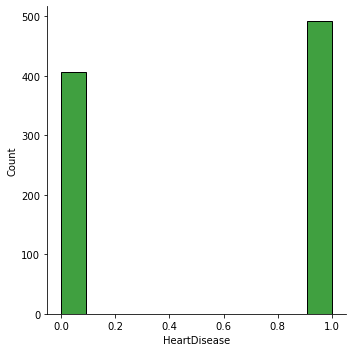

In [984]:
# Another method of bar plot
sns.displot(data["HeartDisease"], color = "green")

<AxesSubplot:xlabel='Sex', ylabel='Count'>

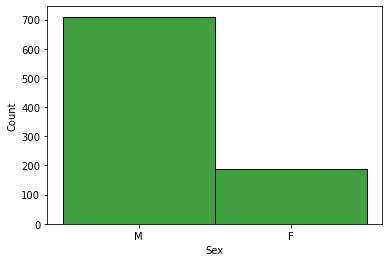

In [985]:
sns.histplot(data = data["Sex"], color = "green" )

<AxesSubplot:xlabel='Age', ylabel='Count'>

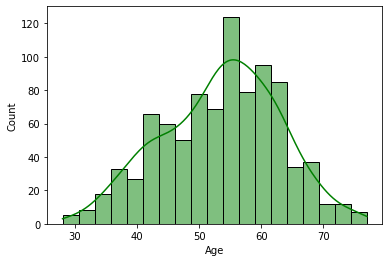

In [986]:
sns.histplot(data["Age"], color = "green", kde = True)

<AxesSubplot:xlabel='Age', ylabel='RestingECG'>

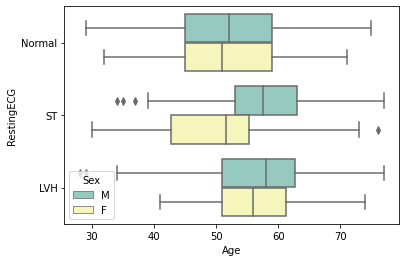

In [987]:
sns.boxplot(data=data, x="Age", y="RestingECG", hue="Sex", palette = "Set3")

<AxesSubplot:xlabel='Age', ylabel='ExerciseAngina'>

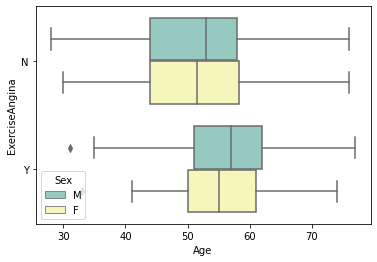

In [988]:
sns.boxplot(data=data, x="Age", y="ExerciseAngina", hue="Sex", palette = "Set3")

<AxesSubplot:xlabel='Age', ylabel='ST_Slope'>

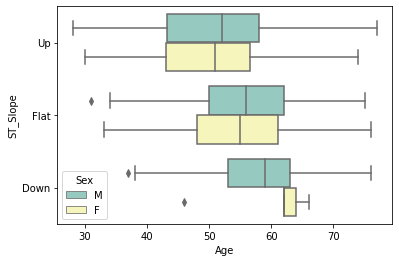

In [989]:
sns.boxplot(data=data, x="Age", y="ST_Slope", hue="Sex", palette = "Set3")

<AxesSubplot:title={'center':'Number of Chest Pain Types in Dataset'}, ylabel='ChestPainType'>

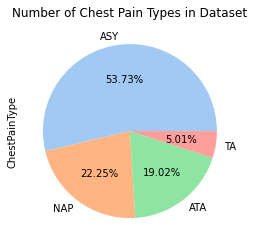

In [990]:
plt.title('Number of Chest Pain Types in Dataset')
data.ChestPainType.value_counts().plot(kind='pie',autopct = '%1.2f%%', colors = sns.color_palette('pastel'))

<AxesSubplot:title={'center':'Types of Resting Blood Pressure Count in Dataset'}, ylabel='RestingECG'>

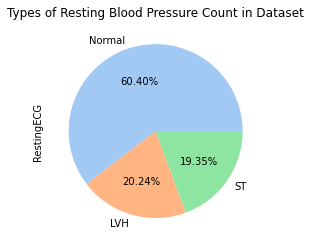

In [991]:
plt.title('Types of Resting Blood Pressure Count in Dataset')
data.RestingECG.value_counts().plot(kind='pie',autopct = '%.2f%%', colors = sns.color_palette('pastel'))

<AxesSubplot:title={'center':'Split of exercise-induced angina in Dataset'}, ylabel='ExerciseAngina'>

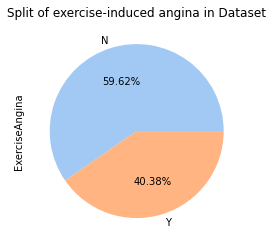

In [992]:
plt.title('Split of exercise-induced angina in Dataset')
data.ExerciseAngina.value_counts().plot(kind='pie',autopct = '%.2f%%', colors = sns.color_palette('pastel'))

<AxesSubplot:title={'center':'Count for the slope of the peak exercise ST segment in Dataset'}, ylabel='ST_Slope'>

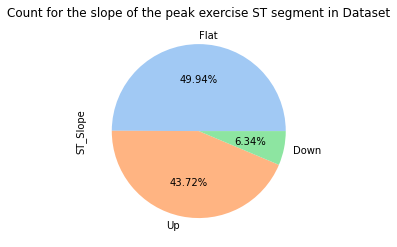

In [993]:
plt.title('Count for the slope of the peak exercise ST segment in Dataset')
data.ST_Slope.value_counts().plot(kind='pie',autopct = '%.2f%%', colors = sns.color_palette('pastel'))

# Modelling

## Supervised Learning to predict potential heart disease

### Linear Regression

In [994]:
# Split Data 

# Drop ST_Slope column as well as it directly relates to HeartDisease, which is the label.
X = data.drop(["ST_Slope", "HeartDisease"], axis = 1)
Y = data["HeartDisease"]

# "Empirical studies show that the best results are obtained if we 
# use 20-30% of the data for testing, and the remaining 70-80% of the data for training.""
# https://scholarworks.utep.edu/cs_techrep/1209/#:~:text=We%20first%20train%20our%20model,of%20the%20data%20for%20training.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle = True, train_size = 0.8, test_size = 0.2, random_state = 42)

In [995]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak
815,68,M,NAP,118,277,0,Normal,151,N,1.0
546,48,M,NAP,132,220,1,ST,162,N,0.0
768,64,F,ASY,130,303,0,Normal,122,N,2.0
398,52,M,ASY,165,0,1,Normal,122,Y,1.0
120,47,F,NAP,135,248,1,Normal,170,N,0.0


In [996]:
Y_train.head()

815    0
546    1
768    0
398    1
120    1
Name: HeartDisease, dtype: int64

In [997]:
# Convert categorical variable into dummy/indicator variables for modelling purposes

# The columns are Sex, ChestPainType, RestingECG, ExerciseAngina

X_train = pd.get_dummies(X_train, columns = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina"])

X_test = pd.get_dummies(X_test, columns = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina"])

In [998]:
X_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y
815,68,118,277,0,151,1.0,0,1,0,0,1,0,0,1,0,1,0
546,48,132,220,1,162,0.0,0,1,0,0,1,0,0,0,1,1,0
768,64,130,303,0,122,2.0,1,0,1,0,0,0,0,1,0,1,0
398,52,165,0,1,122,1.0,0,1,1,0,0,0,0,1,0,0,1
120,47,135,248,1,170,0.0,1,0,0,0,1,0,0,1,0,1,0


In [999]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(719, 17) (180, 17) (719,) (180,)


In [1000]:
from sklearn.linear_model import LinearRegression

# Create linear regression object
linreg_model = LinearRegression()

# Fit in the training sets
linreg_model.fit(X_train,Y_train)

LinearRegression()

In [1001]:
# Predictions on training and testing sets
train_predict_linreg = linreg_model.predict(X_train)
test_predict_linreg = linreg_model.predict(X_test)

In [1002]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

MSE_train = mean_squared_error(train_predict_linreg,Y_train)

MSE_test = mean_squared_error(test_predict_linreg,Y_test)

MAE_train = mean_absolute_error(train_predict_linreg,Y_train)

MAE_test = mean_absolute_error(test_predict_linreg,Y_test)

print("Calculated mean squared error with X_train and Y_train:" + '{0:.3f}'.format(MSE_train))

print("Calculated mean squared error  with X_test and Y_test:" + '{0:.3f}'.format(MSE_test))

print("Calculated absolute squared error with X_train and Y_train:" + '{0:.3f}'.format(MAE_train))

print("Calculated absolute squared error  with X_test and Y_test:" + '{0:.3f}'.format(MAE_test))

Calculated mean squared error with X_train and Y_train:0.121
Calculated mean squared error  with X_test and Y_test:0.149
Calculated absolute squared error with X_train and Y_train:0.266
Calculated absolute squared error  with X_test and Y_test:0.305


The mean square error and absolute squared error between the predicted value and actual values are quite close and low. This means the linear regression line is close to the set of data points. 

### Logistic Regression

In [1003]:
data.shape

(899, 12)

In [1004]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression()

logreg_model.fit(X_train,Y_train)

train_predict_logreg = logreg_model.predict(X_train)

test_predict_logreg = logreg_model.predict(X_test)

In [1005]:
# Predict the classes of the testing data set

class_predict_train = logreg_model.predict(X_train)

class_predict_test = logreg_model.predict(X_test)

logreg_train_score = metrics.accuracy_score(Y_train,class_predict_train)

logreg_test_score = metrics.accuracy_score(Y_test,class_predict_test)
    
# Compare the predicted training classes to the actual training 

print("Prediction accuracy score for the training set: " + '{0:.3f}'.format(logreg_train_score))

Prediction accuracy score for the training set: 0.836


In [1006]:
# Compare the predicted testing classes to the actual testing classes

print("Prediction accuracy score for the testing set: " + '{0:.3f}'.format(logreg_test_score))

Prediction accuracy score for the testing set: 0.783


In [1007]:
cm_logreg = confusion_matrix(Y_test, class_predict_test)

print("Confusion matrix of Support Vector Machine:\n ", cm_logreg)

Confusion matrix of Support Vector Machine:
  [[61 25]
 [14 80]]


## Naive Bayes

Thinking: Naive Bayes may not the best appropriate model to use for this dataset as it is based on applying Bayes' theorem with strong (naive) independence assumptions between the features. In this dataset, the features are not independent of each other.

In [1008]:
# Sklearn library
from sklearn.naive_bayes import GaussianNB

# Model
nb = GaussianNB()

# Train
nb.fit(X_train,Y_train)

y_pred = nb.predict(X_test)

In [1009]:
# Accuracy
print("Accuracy of Naive Bayes: {}\n".format(nb.score(X_test,Y_test)))

# Confusion matrix
cm_nb = confusion_matrix(Y_test,y_pred)

print("Confusion matrix of Naive Bayes:\n {}", cm_nb)

Accuracy of Naive Bayes: 0.7666666666666667

Confusion matrix of Naive Bayes:
 {} [[59 27]
 [15 79]]


In [1010]:
print('Accuracy Score',accuracy_score(Y_test,y_pred))

print('Precision Score',precision_score(Y_test,y_pred))

# Measure of true positive counts out of all actual positive values
print('Recall Score',recall_score(Y_test,y_pred))

# Combines precision and recall scores of the model to measure model's accuracy
print('F1 Score',f1_score(Y_test,y_pred))

Accuracy Score 0.7666666666666667
Precision Score 0.7452830188679245
Recall Score 0.8404255319148937
F1 Score 0.79


## K-Nearest Neighbors

In [1011]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies

train_accuracy = []
test_accuracy = []

for k in range(1,15):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train,Y_train)
    
    #Compute accuracy on the training set
    train_accuracy.append(knn.score(X_train,Y_train))
    
    #Compute accuracy on the test set
    test_accuracy.append(knn.score(X_test,Y_test))

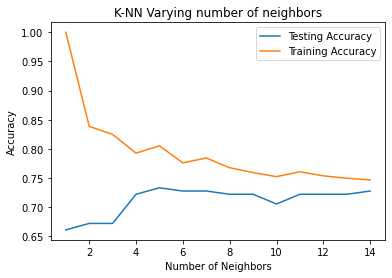

In [1012]:
#Generate plot
plt.plot(range(1,15),test_accuracy,label='Testing Accuracy')
plt.plot(range(1,15),train_accuracy,label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('K-NN Varying number of neighbors')
plt.show()

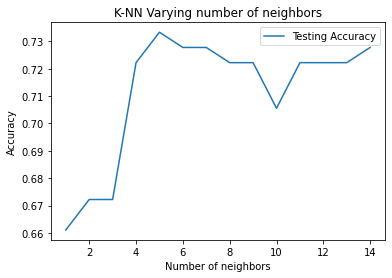

In [1013]:
# Generate plot for only testing accuracy
plt.plot(range(1,15),test_accuracy,label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('K-NN Varying number of neighbors')
plt.show()

In [1014]:
print("Best K value: {}".format(1 + test_accuracy.index(np.max(test_accuracy))))
print("Accuracy: {} ".format(np.max(test_accuracy)))

Best K value: 5
Accuracy: 0.7333333333333333 


In [1015]:
# Cross Validation for the best K value
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)

0.7333333333333333

**Cross Validation**

(This is referenced from University of Waterloo MSCI 446 course)

The trained model's performance is dependent on way the data is split. It might not representative of the model’s ability to generalize.

The solution is cross validation.

Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it. 

In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.

In [1016]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_test,Y_test)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [1017]:
knn_cv.best_score_

0.75

In [1018]:
knn_cv.best_params_

{'n_neighbors': 5}

The best k value is the same in cross validation and the accuracy score is quite close.

## Support Vector Machine (SVM)

In [1019]:
from sklearn.svm import SVC

model_svm = SVC(kernel='rbf')

model_svm.fit(X_train, Y_train)

predict_svm = model_svm.predict(X_test)

In [1020]:
print("The accuracy score is: {}".format(model_svm.score(X_test,Y_test)))

print("\n")

# Confusion Matrix

cm_svm = confusion_matrix(Y_test, predict_svm)

print("Confusion matrix of Support Vector Machine:\n ", cm_svm)

The accuracy score is: 0.7277777777777777


Confusion matrix of Support Vector Machine:
  [[57 29]
 [20 74]]


## Decision Trees

In [1021]:
# Sklearn library
from sklearn.tree import DecisionTreeClassifier

# Model
dec_tree = DecisionTreeClassifier()

# Train
dec_tree.fit(X_train,Y_train)

predict_dt = dec_tree.predict(X_test)

In [1022]:
# Accuracy
print("Accuracy of Decision Tree: ", dec_tree.score(X_test,Y_test))

# Confusion matrix
cm_dt = confusion_matrix(Y_test,predict_dt)
print("Confusion matrix of Decision Tree:\n", cm_dt)

Accuracy of Decision Tree:  0.7333333333333333
Confusion matrix of Decision Tree:
 [[51 35]
 [13 81]]


## Random Forest

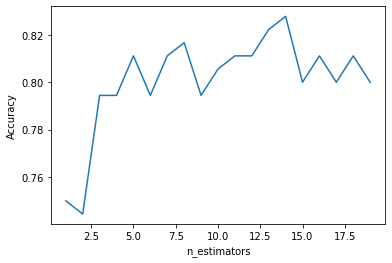

Best n_estimators: 14
Accuracy: 0.8277777777777777


In [1023]:
# Set up lists for training and testing accuracy values
accuracy_train = []
accuracy_test = []

for each in range(1,20):
    
    # Model
    rf_model = RandomForestClassifier(n_estimators=each,random_state=2)
    
    # Train
    accuracy_train.append(rf_model.fit(X_train,Y_train))
    
    # Accuracy
    accuracy_test.append(rf_model.score(X_test,Y_test))
    
# Plot
plt.plot(range(1,20),accuracy_test)
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.show()

print("Best n_estimators: {}".format(1 + accuracy_test.index(np.max(accuracy_test))))
print("Accuracy: {}".format(np.max(accuracy_test)))

In [1024]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=14,random_state=2)

rf.fit(X_train,Y_train)

y_pred = rf.predict(X_test)

In [1025]:
# Accuracy 
print("Accuracy of Random Forest: {}\n".format(rf.score(X_test,Y_test)))

# Confusion matrix
cm_rf = confusion_matrix(Y_test,y_pred)

print("Confusion matrix of Random Forest:\n", cm_rf)

Accuracy of Random Forest: 0.8277777777777777

Confusion matrix of Random Forest:
 [[66 20]
 [11 83]]


## Unsupervised Learning to predict potential heart disease

### Clustering

Unsupervised learning does not require the dataset to be split into train and test datasets.

In [1026]:
# Create a copy of the dataset for unsupervised learning

unsupervised_df = data.copy()

unsupervised_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [1027]:
# Handle categorical data

unsupervised_df['Sex'].replace(['M','F'],[0,1],inplace=True)

unsupervised_df['ChestPainType'].replace(['TA','ATA','NAP','ASY'],[0,1,2,3],inplace=True)

unsupervised_df['RestingECG'].replace(['Normal','ST','LVH'],[0,1,2],inplace=True)

unsupervised_df['ExerciseAngina'].replace(['Y','N'],[0,1],inplace=True)

unsupervised_df['ST_Slope'].replace(['Up','Flat','Down'],[0,1,2],inplace=True)

Attribute Information for Unsupervised Learning
1. Age: age of the patient [years]
2. Sex: sex of the patient [0: Male, 1: Female]
3. ChestPainType: chest pain type [0: Typical Angina, 1: Atypical Angina, 2: Non-Anginal Pain, 3: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
• RestingECG: resting electrocardiogram results [0: Normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by Estes' criteria]
7. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
8. ExerciseAngina: exercise-induced angina [0: Yes, 1: No]
9. Oldpeak: oldpeak = ST [Numeric value measured in depression]
10. ST_Slope: the slope of the peak exercise ST segment [0: upsloping, 1: flat, 2: downsloping]
11. HeartDisease: output class [1: heart disease, 0: Normal]

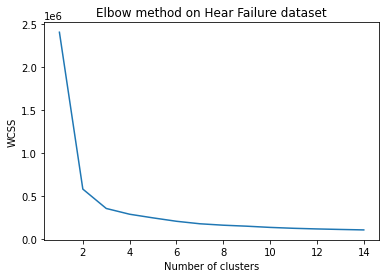

In [1028]:
from sklearn.cluster import KMeans

# Elbow method
wcss = {}

for i in range(1,15):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(unsupervised_df)
  wcss[i] = kmeans.inertia_

plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Hear Failure dataset')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As shown in the graph using Elbow method, an appropriate number of clusters is 2 or 3.

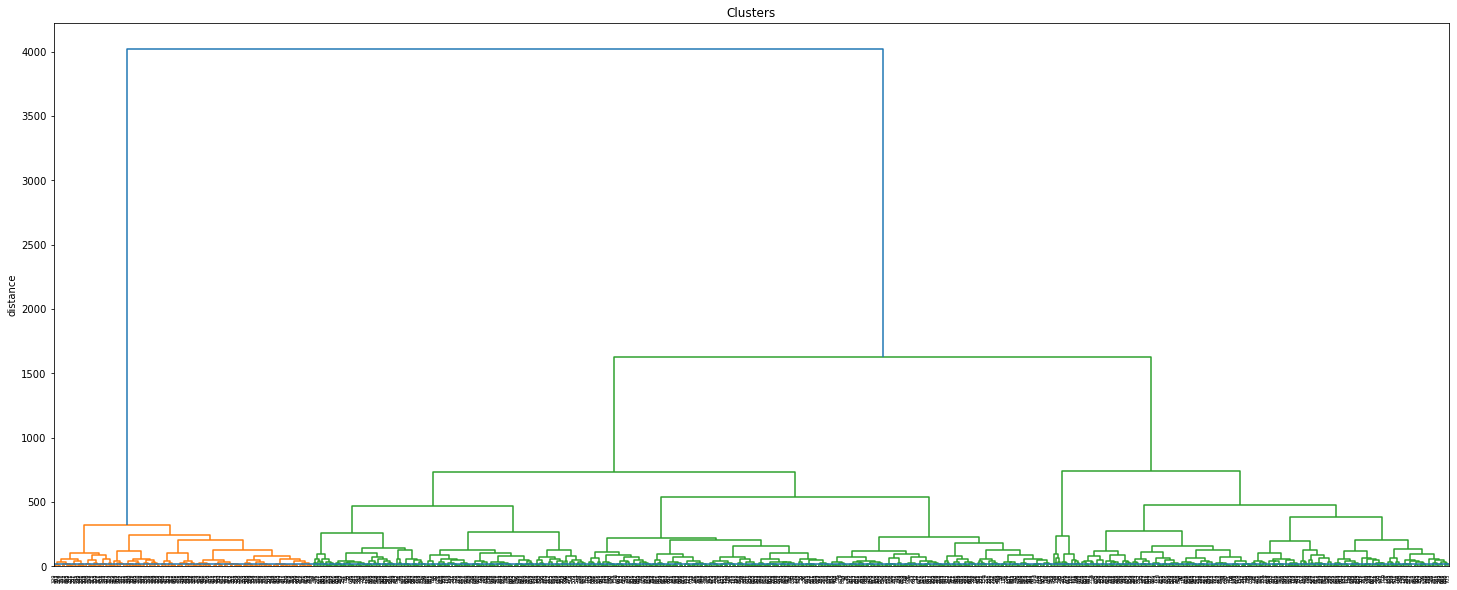

In [1029]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(unsupervised_df,'ward')

plt.figure(figsize=(25,10))
plt.title('Clusters')
plt.ylabel('distance')
dendrogram(Z)

plt.axhline(y=15)
plt.show()

In [1030]:
# Initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters = 3, random_state = 42)

# Fit into the model
kmeans.fit(unsupervised_df)

clusters = kmeans.labels_

In [1031]:
# Reduce dataset dimensions, increase interpretability, and minimize information loss 
# This is to best summarize the total variability of data
from sklearn.decomposition import PCA

# Initialize PCA with 2 components
pca = PCA(n_components = 3, random_state = 42)

# Store the 2 dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [1032]:
# Create dataframe 
dataset_df = pd.DataFrame()

# Store clusters, category, and PCA vectors to the dataframe
dataset_df["x0"] = x0 
dataset_df["x1"] = x1
dataset_df["cluster"] = clusters

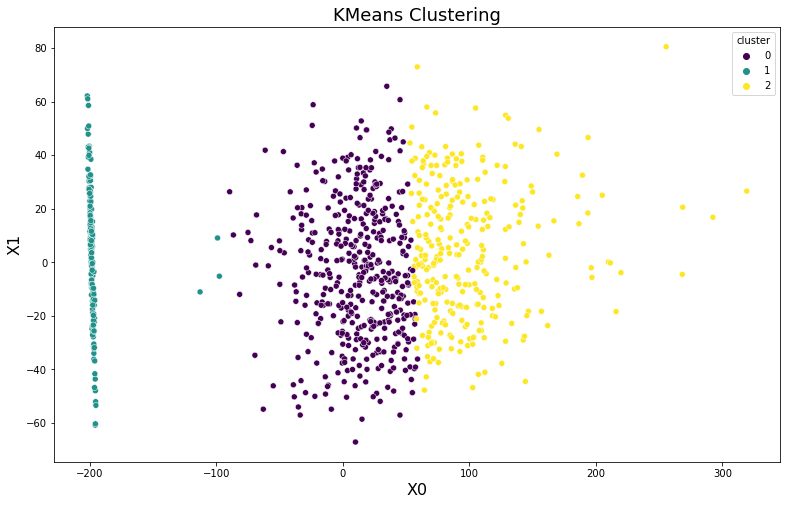

In [1033]:
# Generate plot

# Figure size
plt.figure(figsize=(13, 8))

# Title
plt.title("KMeans Clustering", fontdict={"fontsize": 18})

# x and y axes 
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})

# Create scatter plot with seaborn and group data useing hue
sns.scatterplot(data=dataset_df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

In [1034]:
unsupervised_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

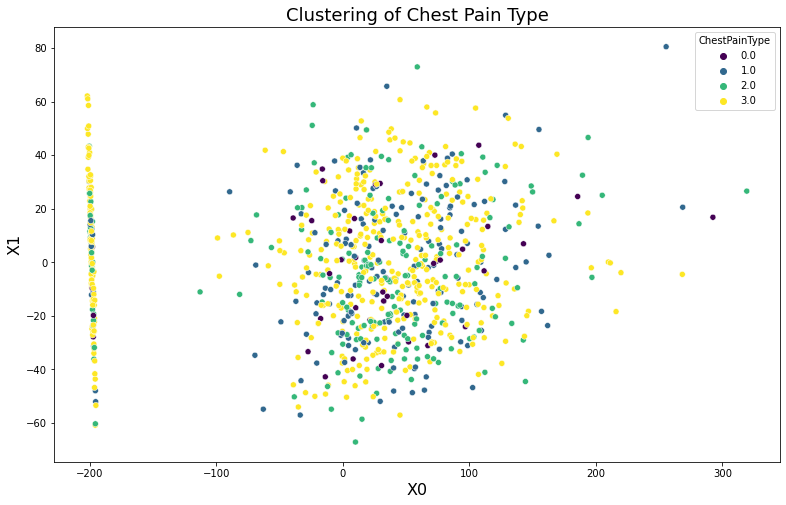

In [1035]:
dataset_df["ChestPainType"] = unsupervised_df.ChestPainType

# Clusters based on Chest Pain Type
# Figure size
plt.figure(figsize=(13, 8))

# Title
plt.title("Clustering of Chest Pain Type", fontdict={"fontsize": 18})

# x and y axes
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})

# Create scatter plot with seaborn, where hue is the class used to group the data based on chest pain type
sns.scatterplot(data=dataset_df, x='x0', y='x1', hue='ChestPainType', palette="viridis")
plt.show()